<a href="https://colab.research.google.com/github/rahulll-gif/task1/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (1).zip to archive (1) (2).zip
Extracted files: ['Titanic-Dataset.csv']

Loaded file: Titanic-Dataset.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   Na

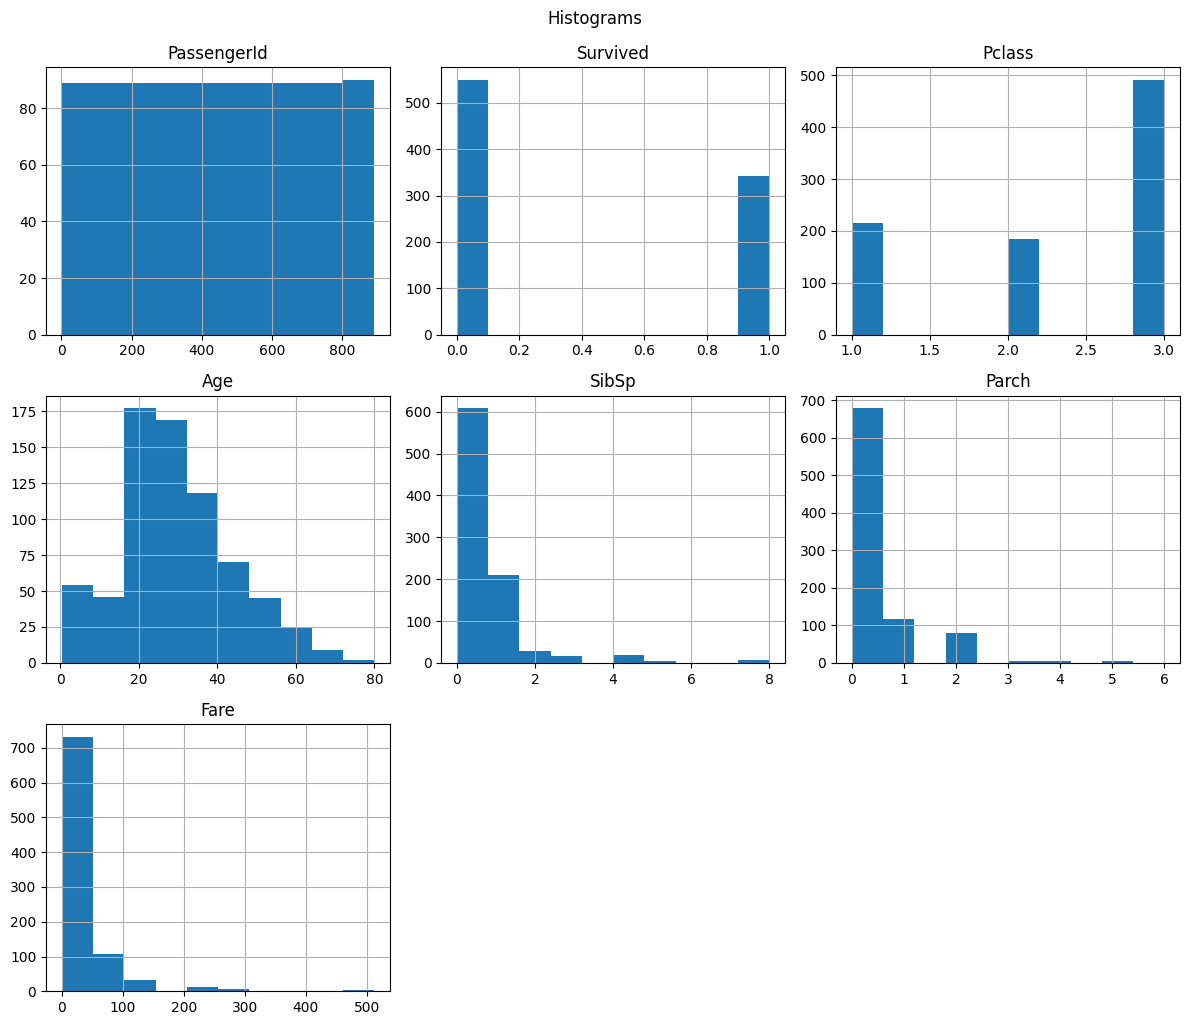


Generating Boxplots...


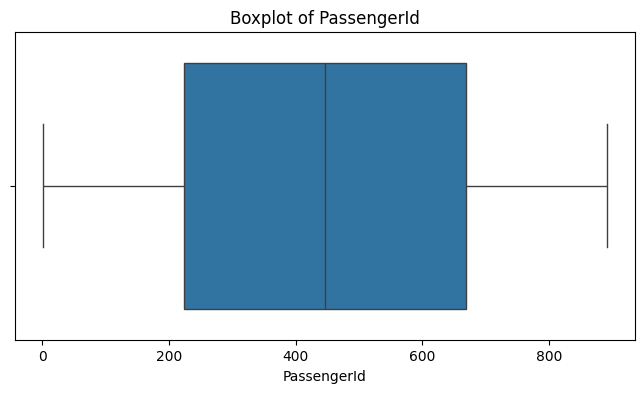

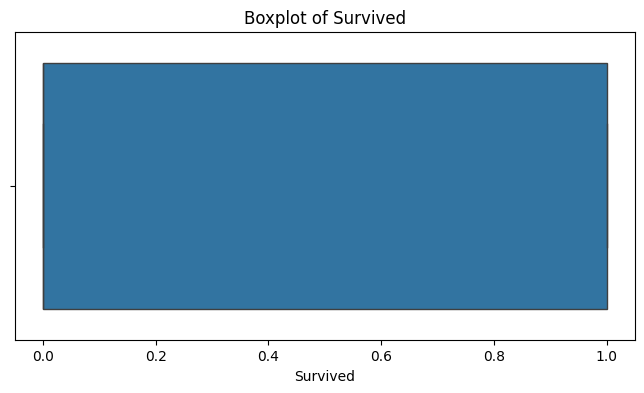

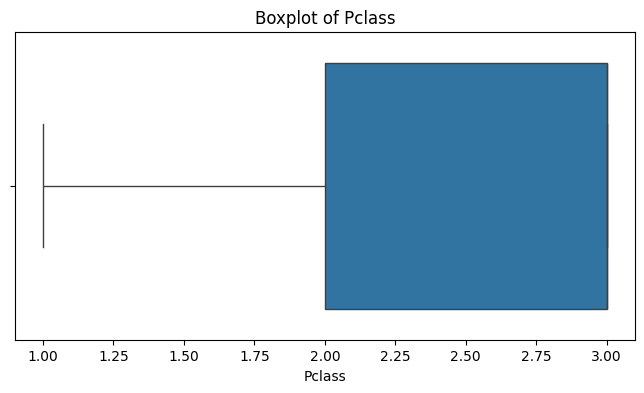

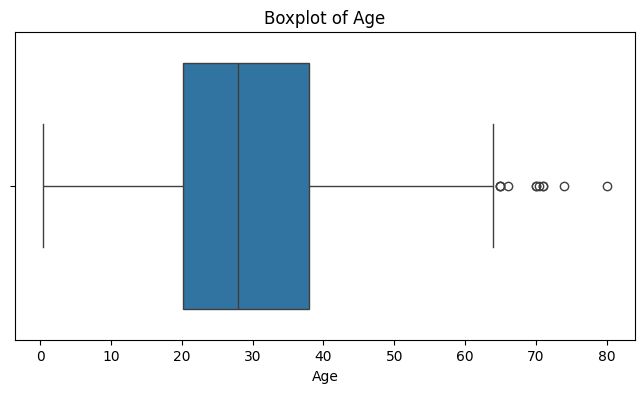

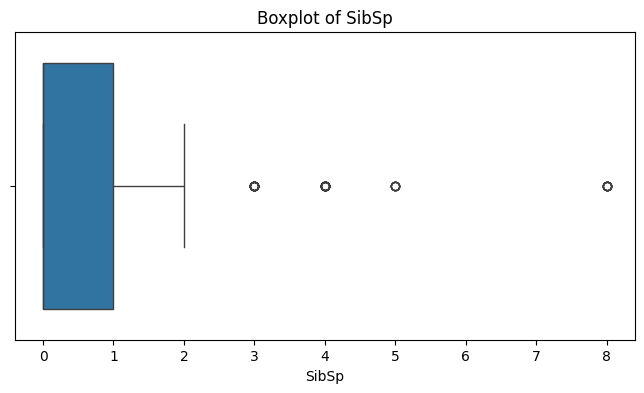

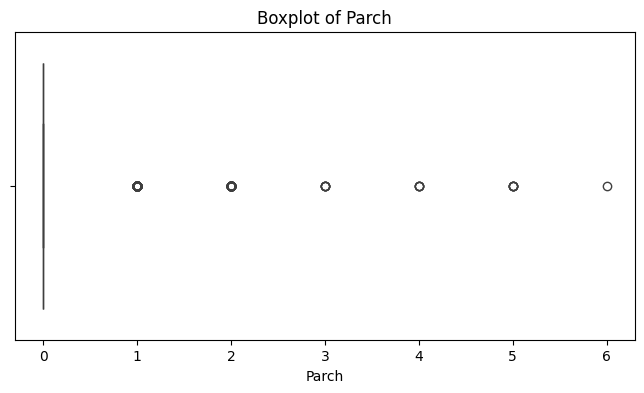

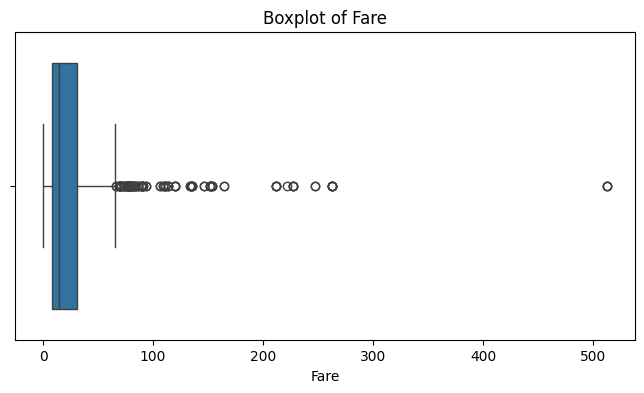


Generating Correlation Matrix...


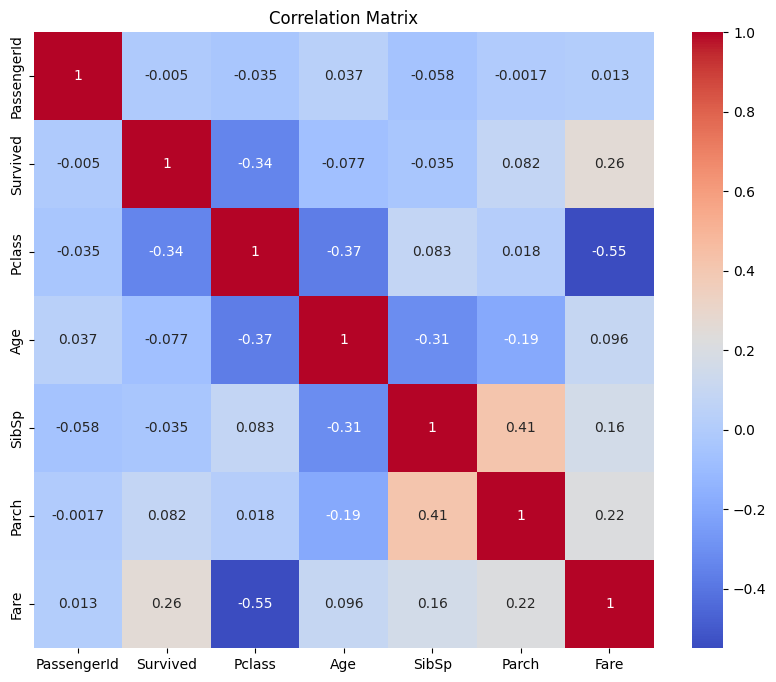


Generating Pairplot...


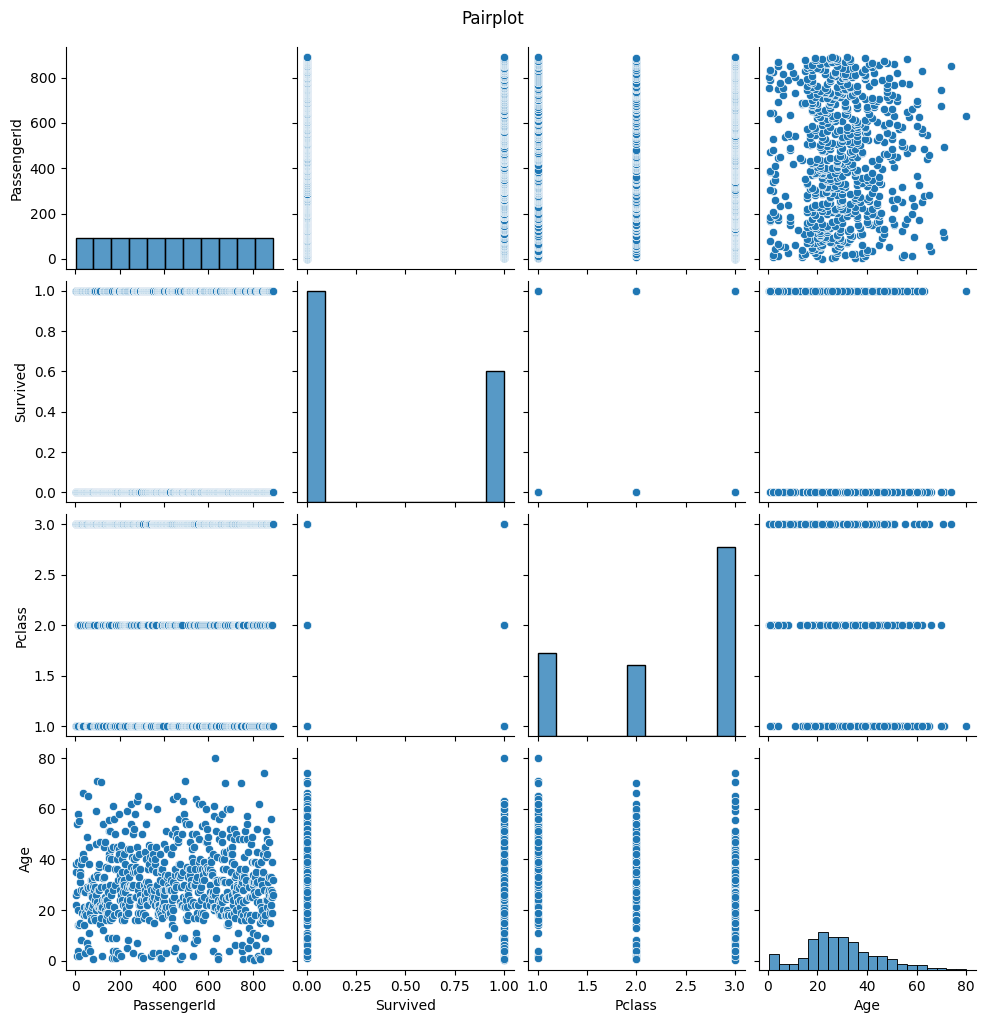


--- Skewness of Numeric Columns ---
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


In [3]:
from zipfile import ZipFile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
with ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")
print("Extracted files:", os.listdir("dataset"))
csv_files = [file for file in os.listdir("dataset") if file.endswith('.csv')]
csv_file = csv_files[0]
df = pd.read_csv(f"dataset/{csv_file}")
print(f"\nLoaded file: {csv_file}")
print(df.head())
print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\nGenerating Histograms...")
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.suptitle("Histograms", y=1.02)
plt.show()
print("\nGenerating Boxplots...")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
print("\nGenerating Correlation Matrix...")
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
print("\nGenerating Pairplot...")
sample_cols = numeric_cols[:4]
sns.pairplot(df[sample_cols])
plt.suptitle("Pairplot", y=1.02)
plt.show()
print("\n--- Skewness of Numeric Columns ---")
print(df.skew(numeric_only=True))
